In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
probing_folder = 'logs/hypertune_no_strategy_simsiam_11-26_16-04/no_strategy_simsiam_cifar100_11-26_16-04/probing_upto/probing_ratio1'

In [17]:
probe_exp_df_list = [] # List of tuples (Dataframe, exp_index)

# Read all csv, one for each experience on which probing has been executed
for file in os.listdir(probing_folder):
        if file.endswith('.csv'):
            probe_exp = int(file.split('.csv')[0].split('probe_exp_')[-1])
            print('expidx:', probe_exp)
            df = pd.read_csv(os.path.join(probing_folder, file))
            probe_exp_df_list.append((df, probe_exp))

# Find df with highest exp_index in probe_exp_df_list
final_df = max(probe_exp_df_list, key=lambda x: x[1])[0]

# Sort by exp idx
probe_df_list = [tup[0] for tup in sorted(probe_exp_df_list, key=lambda x: x[1])]

expidx: 11
expidx: 0
expidx: 13
expidx: 14
expidx: 1
expidx: 10
expidx: 19
expidx: 5
expidx: 16
expidx: 6
expidx: 2
expidx: 15
expidx: 7
expidx: 18
expidx: 12
expidx: 4
expidx: 17
expidx: 3
expidx: 9
expidx: 8


### Final accuracy

In [18]:
final_df = probe_df_list[-1]

Final accuracy for each probing epoch.

In [19]:

for exp_idx, acc in enumerate(final_df['test_acc'].to_list()):
    print(f'Experiment {exp_idx} had final accuracy of {acc}')

Experiment 0 had final accuracy of 0.0806


Final Average Accuracy

In [20]:
final_avg_acc =  final_df['test_acc'].mean()
print(f'Final average accuracy: {final_avg_acc:.4f}')

Final average accuracy: 0.0806


### Anytime Accuracy

In [21]:
# Concat all rows having same exp_idx value across all df in probe_df_list
concatenated_df = pd.concat(probe_df_list, ignore_index=True)
concatenated_df.info()
grouped_df = concatenated_df.groupby('probing_exp_idx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   val_acc   20 non-null     float64
 1   test_acc  20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


KeyError: 'probing_exp_idx'

In [ ]:
sum_anytime_acc = 0

for probing_exp_idx, df in grouped_df:
    sum_anytime_acc += df['test_acc'].mean()

average_anytime_acc = sum_anytime_acc / len(grouped_df)

print(f'Average anytime accuracy: {average_anytime_acc:.4f}')


Average anytime accuracy: nan


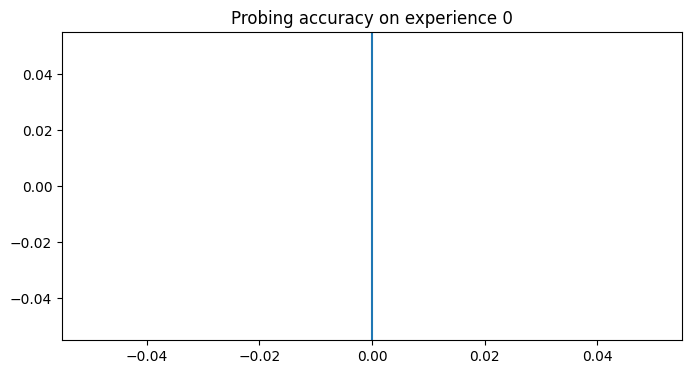

In [ ]:
for probing_exp_idx, df in grouped_df:
    fig = plt.figure(figsize=(8, 4))

    plt.plot(df['test_acc'].to_list(), label=f'Probe on exp {probing_exp_idx}')

    plt.title(f'Probing accuracy on experience {probing_exp_idx}')
    # Plot a vertical line at exp_idx, same color 
    plt.axvline(x=probing_exp_idx, color=plt.gca().lines[-1].get_color())

    plt.show()

#plt.legend()
#plt.show()
